#### 1. Importamos las librerías necesarias

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

#### 2. Cargamos el dataset

In [2]:
import os

DATA_PATH = os.path.join("..", "..", 'data', 'raw', 'data_libros.csv')

df_books = pd.read_csv(DATA_PATH)
df_books.columns = ['Horas_de_lectura', 'Libros_leidos']

df_books.head()

,Horas_de_lectura,Libros_leidos
0,0.000000,0.099343
1,0.066890,0.000000
2,0.133779,0.162983
3,0.200669,0.354773
4,0.267559,0.020059


#### 3. Dividir el dataset en parte de entrenamiento y prueba

In [3]:
X_horas_lectura = df_books.iloc[:, 0].values.reshape(-1,1)
y_libros_leidos = df_books.iloc[:, 1].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X_horas_lectura, y_libros_leidos, test_size=0.3, random_state=20)

#### 4. Entrenamiento del modelo

In [4]:
model = LinearRegression()
model.fit(X_train, Y_train)

# Mostrar los parámetros del modelo
weight = model.coef_[0][0]
bias = model.intercept_[0]

print(f'El peso del modelo es: {weight:.3f}')
print(f'El intercepto del modelo es: {bias:.3f}')

El peso del modelo es: 0.251
El intercepto del modelo es: -0.012


#### 5. Graficando el modelo

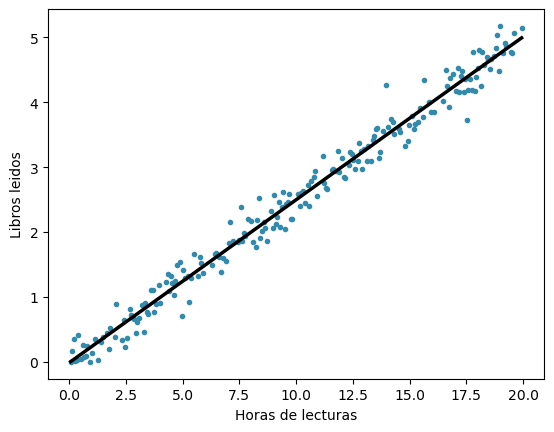

In [5]:
x = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1)
y = bias + x * weight

plt.scatter(X_train, Y_train, color='#328aac', marker='.')
plt.xlabel('Horas de lecturas')
plt.ylabel('Libros leidos')
plt.plot(x, y, color='#000', linewidth=2.5, linestyle='-');

#### 6. Realizando predicciones y evaluando el modelo

In [6]:
y_predicciones = model.predict(X_test)

MSR = mean_squared_error(Y_test, y_predicciones)
r2 = r2_score(Y_test, y_predicciones)

print(f"Error cuadrático medio: {MSR:.2f}")
print(f"Coeficiente de determinación: {r2:.2f}")

Error cuadrático medio: 0.04
Coeficiente de determinación: 0.98


#### 7. Realizando la gráfica de residuos

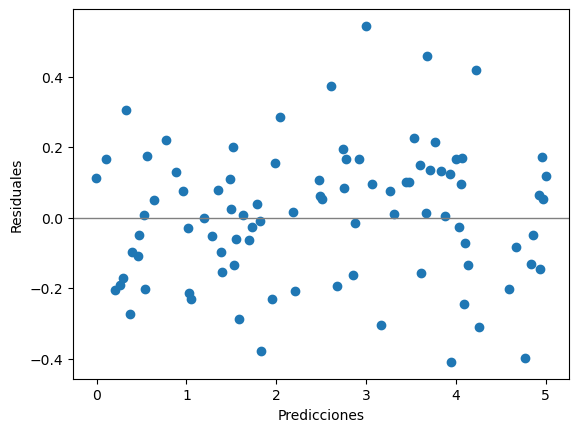

In [7]:
residuos = np.subtract(Y_test, y_predicciones)
plt.scatter(
    y_predicciones,
    residuos
)
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.axhline(y=0, color='gray', linewidth=1)
plt.show()